# Introduction to Numpy and Matplotlib
One of the main reasons why Python is so powerful is that it has different libraries (developed by different teams) doing specific tasks very well. Numpy for example handles numbers (in multidimenisonal arrays/matrices) while Matplotlib handles 2D plotting very well. Together with other libraries such as Pandas, they act as the main workhorses of data science studies in Python. 

If you have some experience with Matlab, you'll have a familiar feeling working Numpy and Matplotlib as many of the functionalities and styles in Matlab are emulated here (read: ripped-off). 

If you are familiar with [*software name censored*], you'll regret all the many hours you spent ![excel_formatting](files/excel.jpg "Title") formatting those charts (fine, it's Excel. And don't get me started on Google Docs).

In this notebook, we will go through the following:
1. Basic overview of Numpy.
2. How to generate and format various types of plots including line plot, histogram and 3D surface plot using Matplotlib.
3. Use related libraries such as 
    * Seaborn (plotting library on top of Matplotlib)
    * Sympy (scientific computation)
    * urllib (download files via url)

You will need an internet access during this session.

Oh did we mention this?
![charlie_explaining_python](files/charlie_explaining_python.png "Title")

# 1. Introduction

First we have to import our libraries. Here ```plt``` and ```np``` are the aliases we give to Matpotlib and Numpy. These aliases could be anything, but please use these conventions. 

In [1]:
import  matplotlib.pyplot as plt
import numpy as np

There are some additional things we might want to do. 
1. Display our plots in this notebook instead of separate windows, but . This can be made using ```%matplotlib inline```
2. Specify the seed (needs to be an integer) for the random number generation in Numpy using ```np.random.seed(seed=your_chosen_seed)```. Doing this will make sure the same results can be reproduced everytime even on different computers. (NOTE: Jupyter doesn't seem to this take seed number if we run our code from separate cell. So, just copy this line into the same cell from which we call the random number generator).

In [2]:
%matplotlib inline
np.random.seed(seed=4400) # (NOTE: Jupyter doesn't seem to this take seed number if 
                          # we run our code from separate cell. 
                          # So, just copy this line into the same cell from which 
                          # we call the random number generator).

We typically put these two lines on top of our code, after importing Numpy and Matplotlib.

# 2. Numpy

## 2.1 Creating arrays
Let's explore some of the methods to create Numpy arrays.

First, create a list ```A```.

In [3]:
A = [1,2,3,4,5]

print(A)
print(type(A))

[1, 2, 3, 4, 5]
<class 'list'>


To create an array from a list, use ```np.array```. We can check the shape and dimension of our array using ```.shape``` and ```.ndim```.

In [4]:
B = np.array(A)

print(B)
print(type(B))
print(B.shape) # aray shape
print(B.ndim) # array dimension

[1 2 3 4 5]
<class 'numpy.ndarray'>
(5,)
1


To create a 2D array filled with ones, we use ```np.ones((n_row, n_column))```

In [5]:
C = np.ones((5,2))

print(C)
print(type(C))
print(C.shape) # aray shape
print(C.ndim) # array dimension

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
<class 'numpy.ndarray'>
(5, 2)
2


Similarly for an array filled with zeros.

In [6]:
np.zeros((3,6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

We can also use ```np.full(((n_row, n_column)), value)```

In [7]:
np.full((4,2),99)

array([[99, 99],
       [99, 99],
       [99, 99],
       [99, 99]])

Sometimes, it is useful to create an arrays full of NaN (not a numbers)

In [8]:
np.full((4,2),np.nan)

array([[ nan,  nan],
       [ nan,  nan],
       [ nan,  nan],
       [ nan,  nan]])

To create 5 evenly spaced numbers in the range of 0 to 2, we use ```np.linspace(0,2,5)```

In [9]:
np.linspace(0,2,5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ])

To create a range of numbers from 0 to 105 with an interval of 10, we use ```np.arange(0,105,10)```

In [10]:
np.arange(0,105,10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

To create an array of random integers between 80 and 100 with a dimension of (5,3), we use ```np.random.randint(80,100,size=(5,3))```. Note that we also need to re-seed our number generator to generate predictable random numbers (this is a problem unique to Jupyter).

In [11]:
np.random.seed(seed=4400)
np.random.randint(80,100,size=(5,3))

array([[83, 87, 85],
       [84, 83, 99],
       [83, 95, 94],
       [96, 81, 86],
       [99, 88, 88]])

## 2.2 Indexing

First, let's run this code - we shall use it later to visualise our arrays using Matplotlib. Don't worry if you don't understand the code yet!

In [12]:
def plot_2D_array(my_array,rescale_fig=0.7):
    '''
    Visualise a given my_array 2D numpy data. Use the optional rescale_fig 
    to resize the plot accordingly.
    
    '''
    i_dim, j_dim = my_array.shape

    fig, ax = plt.subplots(figsize=(j_dim*rescale_fig, i_dim*rescale_fig))
    im = ax.imshow(my_array)

    ax.set_xticks(np.arange(j_dim))
    ax.set_yticks(np.arange(i_dim))
    ax.set_xticklabels(np.arange(j_dim))
    ax.set_yticklabels(np.arange(i_dim))
    ax.set_xlabel('j', fontsize=14)
    ax.set_ylabel('i', fontsize=14,rotation=0)

    # Loop over data dimensions and create text annotations.
    for i in range(i_dim):
        for j in range(j_dim):
            text = ax.text(j, i, my_array[i, j],
                           ha="center", va="center", color="w")
    fig.tight_layout()
    plt.show()

We now can call ```plot_2D_array``` to pass a 2D array for visualisation. For example:

[[21 24 35 60]
 [39  5 68 35]
 [51 29 22 35]]


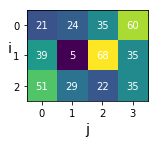

In [13]:
np.random.seed(seed=4400)
# create an array
A = np.random.randint(100,size=(3,4))
print(A)
# visualise it by calling plot_2D array we defined above.
plot_2D_array(A)

In the diagram above, the addresses or indexes of each array entry are shown on the axes. To access the i-th row and j-th column, we use ```A[i,j]```.

In [14]:
A[1,3]

35

We can also access a range of entries in the array, for example:

In [15]:
B = A[0:2,1:3]
B

array([[24, 35],
       [ 5, 68]])

## 2.3 Exercise
Below, we create a $8\times8$ array with random integer between 0 to 100. Change the values in a subset of array A to -50 using the following indexes. We've completed the first one for you.
1. ```A[3,:-2]```
1. ```A[0,:-1]```
1. ```A[:,2:5]```
1. ```A[3:6,3:]```

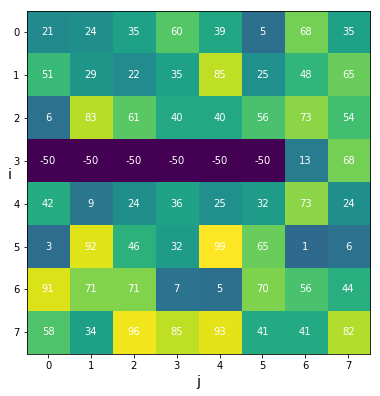

In [16]:
np.random.seed(seed=4400)
# create an array
A = np.random.randint(100,size=(8,8))

# Change the indexing here
A[3,:-2] = -50

# visualise it by calling plot_2D array we defined above.
plot_2D_array(A)

# 3. Matplotlib

We first create a 1D array called ```time``` using ```np.linspace(0,2,50)```. 

Then create a sinusoidal signal using ```signal = 2*np.sin(2*np.pi*time)```. Here, were are calling built-in ```sin``` and ```pi``` functions in Numpy.

In [17]:
time = np.linspace(0,2,50)
signal = 2*np.sin(2*np.pi*time)

Plot ```time``` vs. ```signal```.

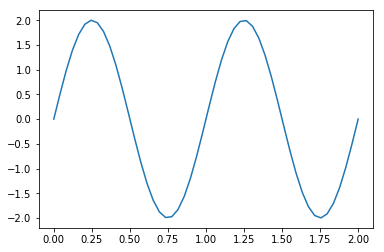

In [18]:
plt.plot(time,signal)

## 3.1 Basic Formating
We now explore some of the typical formatting we need for our plot. First run the following ```example_plot``` function (it won't give any output for now)

In [19]:
def example_plot(x,y):
    '''
    Plots x vs. y values with some pre-determined formatting.  
    '''
    plt.plot(x,y,'--r',linewidth=3, label='red line')

    plt.text(1.25,1,'Peak')

    plt.title('Title with Greek letter $\sigma$', fontsize=15)

    # axis limit
    plt.xlim(0,2)
    plt.ylim(-2,2)

    # axis labels
    plt.xlabel('x')
    plt.ylabel('y')

    # activate legend
    plt.legend(loc='upper left')       

Then, call ```example_plot``` by passing ```time``` and ```signal``` as `x` and `y`.

Then ```plt.savefig``` to save the plot. Optionally, we can use ```plt.tight_layout()``` to get rid of the large white margin in our saved plot.

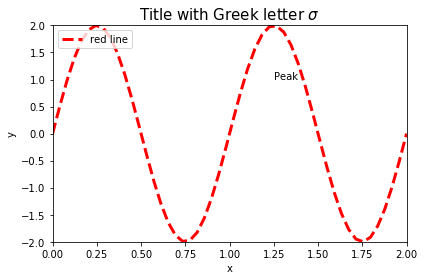

In [20]:
# plot time vs. signal by calling example_plot function
example_plot(time,signal)

# reduce the margin/whitespace around the plot
plt.tight_layout()
# save the figure
plt.savefig('files/my_saved_plot.png')

Check your working folder. You should have a new file called 'my_saved_plot.png'. Here we specified it as '.png' format. Of course, you can also use '.jpg'.

## 3.2 Exercise
Now we want to explore some of the formatting ourselves.

Without using the ```example_plot``` function, reproduce the plot above but with the following modifications
1. Change the solid red line to green star and label this as ```label='Old signal'```
2. Add new plot with ```0.1*signal``` in the y axis. Use blue line with ```linewidth=5``` and ```label='New signal'```
2. Add an arrow pointing to the peak at (1.25,2) using ```plt.arrow```.
2. Relabel the axes with 'Time (s)' (x axis) and 'Signal (kV)' (y axis)
3. Change $\sigma$ in the title to $\hat{\omega}_n$ (hint: Google 'Latex greek letters') and change the font size to 20 (hint: use ```fontsize```). 
4. Make sure the legend is not blocking the lines.

Make sure to add the formatting one by one, and see the resulting plot before adding the next formatting. We have added ```plt.plot(time, signal, '*g')``` for item 1 for you the get started.

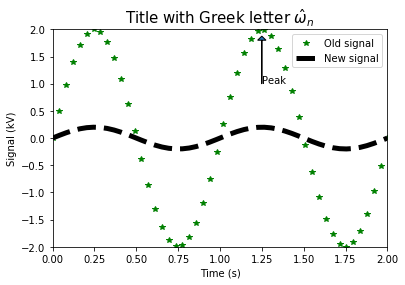

In [21]:
# e.g to change the solid red line to green star
plt.plot(time, signal, '*g', label='Old signal')

#answer**************************************************************
plt.plot(time, 0.1*signal, '--k', linewidth=5,label='New signal')
plt.text(1.25,1,'Peak');
plt.arrow(1.25,1, 0,0.8, head_width=0.05)
plt.xlabel('Time (s)')
plt.ylabel('Signal (kV)')
plt.title('Title with Greek letter $\hat{\omega}_n$', fontsize=15)
plt.xlim(0,2)
plt.ylim(-2,2)
plt.legend(loc='best')
#answer**************************************************************

## 3.3 Multiple subplots
We can also have the previous two plots on separate subplots. To do this we use ```plt.subplot(total_plot_in_y, total_plot_in_x, increment)```. For example:

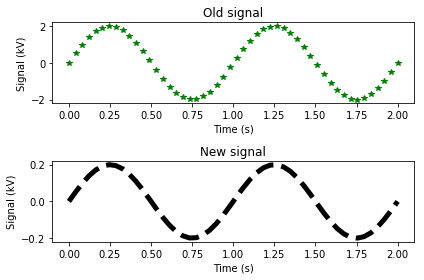

In [22]:
# first plot
plt.subplot(2, 1, 1)
plt.plot(time, signal, '*g', label='Old signal')
plt.title('Old signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal (kV)')

# second plot
plt.subplot(2, 1, 2)
plt.plot(time, 0.1*signal, '--k', linewidth=5,label='New signal')
plt.title('New signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal (kV)')

plt.tight_layout()

So far we have been adding the plot on figures, without explicitly creating a figure object. Most of the times, we can get away with this. However, sometimes we may need further control on the figure, for example to change the size of the figure in inch. 

To do this we have to create a figure object using ```plt.figure()``` as pass the ```figsize=(my_x_length, my_y_length)``` as an argument. For example:

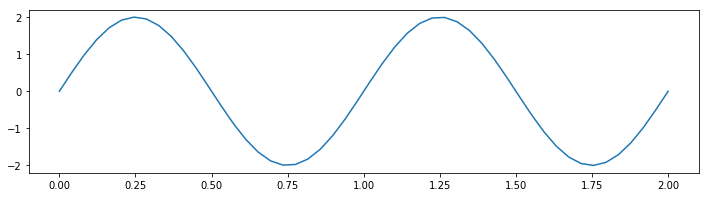

In [23]:
# create a figure object
my_fig = plt.figure(figsize=(12,3)) 

# replot time vs. signal
plt.plot(time,signal)

Similarly, we can also explicitly create multiple axis objects using ```plt.subplots(total_plot_in_y, total_plot_in_x)```. For example.

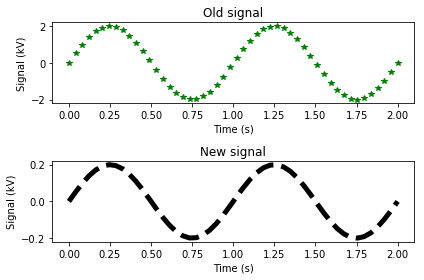

In [24]:
# adding multiple axis objects  
my_fig, (my_ax1, my_ax2) = plt.subplots(2,1)

# plot by calling first axis
my_ax1.plot(time, signal, '*g', label='Old signal')
my_ax1.set_title('Old signal')
my_ax1.set_xlabel('Time (s)')
my_ax1.set_ylabel('Signal (kV)')

# plot by calling second axis
my_ax2.plot(time, 0.1*signal, '--k', linewidth=5,label='New signal')
my_ax2.set_title('New signal')
my_ax2.set_xlabel('Time (s)')
my_ax2.set_ylabel('Signal (kV)')

my_fig.tight_layout()

Notice that we need to plot on the axis (e.g. ```my_ax1.plot()``` instead of ```plt.plot()```) and the formatting syntax is a bit different now (e.g. ```my_ax1.set_title``` instead of ```plt.title()```).

## 3.4 Histogram

Let's see how we can plot a histogram. First, we generate a 1000 random data with a mean $\mu$=20 and standard deviation $\sigma$=10.

In [25]:
# Generate random data 
data = np.random.normal(100,10,1000)

Check that we are really getting the right data by calculating $\mu$ and $\sigma$ using ```np.mean``` and ```np.std```

In [26]:
# Fit a normal distribution to the data:
mu, std = np.mean(data), np.std(data)
mu, std

(100.22392549076137, 9.765217266475215)

Use ```plt.hist``` to plot the histogram of data. Use the optional ``bins`` for number of bins and ```alpha``` to control the transparency of the plot. 

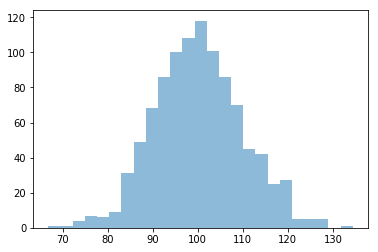

In [27]:
# Plot the histogram.
plt.hist(data, bins=25, alpha=0.5);

## 3.5 3D plot

How about a 3D plot? 

First we create a dummy 3D data in the  x, y and z directions.
1. Create the ranges of values in x and y axes. For example for -5 ot 5 data with 0.25 step in between each point, we use ```x = np.arange(-5, 5, 0.25)```.
2. Create X and Y coordinates using ```X, Y = np.meshgrid(x, y)```. This will give us two 2D arrays of ```X``` and ```Y```.
3. For a given coordinate in ```X``` and ```Y```, we need to give the value in ```Z``` axis. Let's assume ```Z = np.sin(np.sqrt(X**2 + Y**2))``` (just to get a pretty plot).

In [28]:
# Create dummy data.
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)

# Create a 2D mesh
X, Y = np.meshgrid(x, y)

# A dummy function to give nice looking plot
Z = np.sin( np.sqrt(X**2 + Y**2) )

To plot ```X```, ```Y``` and ```Z```: 
1. We need to import Axes3D using ```from mpl_toolkits.mplot3d import Axes3D```. 
2. We also need to plot in a dedicated axis object specified as a 3D projection.

3. Then use ```plot_surface(X, Y, Z, cmap=my_cmap)``` to plot X, Y and Z data. ```cmap``` is the type of colour mapping. 

4. We can add the color bar using ```fig.colorbar(my_surface)```. Here we need to explicitly point it to a specific plot, hence the reason we have to give our plot in step 3 a name.

For example, the corresponding code for each steps are:

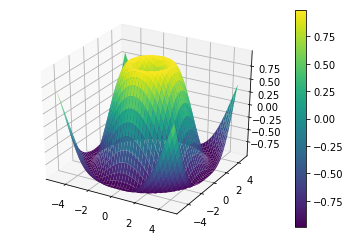

In [29]:
# step 1
from mpl_toolkits.mplot3d import Axes3D

# step 2
my_fig = plt.figure() # instantiate a figure object
my_ax = my_fig.gca(projection='3d') # instantiate 3D axis

# step 3
my_surface  = my_ax.plot_surface(X, Y, Z, cmap='viridis')

# step 4
my_fig.colorbar(my_surface)

## 3.6 Seaborn
So far we have been using the default formatting for Matplotlib. There are couple of others libraries such as Seaborn and Plotly that are built on top of Matplotlib. Often, these libraries make the plots look prettier and they have some other additional tools for rapid visualisation. Let's now explore some of these features in Seaborn. 

In [30]:
import seaborn as sns
sns.set()

Let's replot some of our previous graphs.

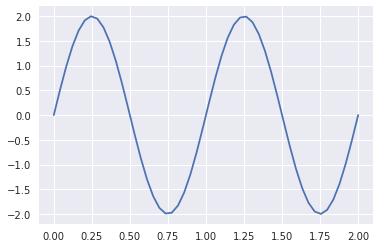

In [31]:
plt.plot(time,signal);

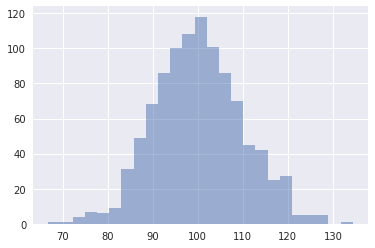

In [32]:
plt.hist(data, bins=25, alpha=0.5);

To illustrate a more complex visualisation, let import a sample dataset from Seaborn.

In [33]:
# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


The ```flight``` dataset is Pandas dataframe format. Don't worry if you are not familiar with it yet.

Using Seaborn, we can visualise the dataset easily using a heatmap. 

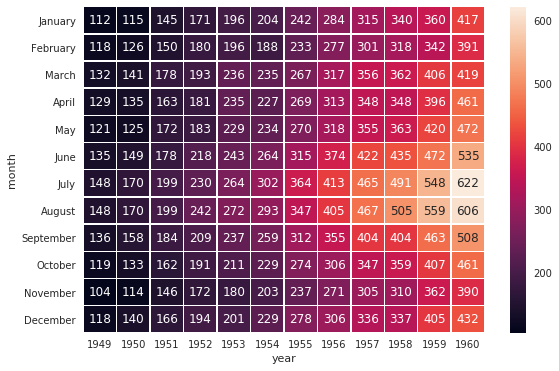

In [34]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

There are other features available in Seaborn that you can check it yourself. 

For now, let's revert back to default Matplotlib formatting.

In [35]:
sns.reset_orig()

## 3.7 Raster graphics
First let's create a dummy 2D array.

In [36]:
# create a 100x100 array with values of 1 to 10000
X = np.arange(10000)
X = X.reshape(100,100)

For data stored in 2D arrays, we can visualise them using ```imshow```.

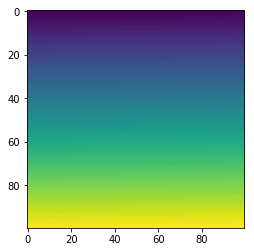

In [37]:
# use imshow to visualise the array
plt.imshow(X);

As we have seen before, the default colormap above is called ```'viridis'```. Use ```cmap='jet'``` to change the colormap to rainbow and save the figure.

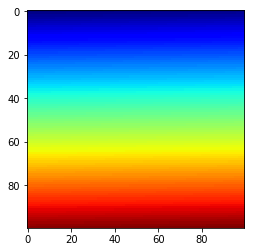

In [38]:
plt.imshow(X,cmap='jet')
plt.savefig('files/rainbows.png')

We can import any images into ```numpy``` array using ```matplotlib.image``` 

In [39]:
import matplotlib.image as mpimg

Load the previously saved image using ```mpimg.imread```.

In [40]:
img = mpimg.imread('files/rainbows.png')

Then visualise it using ```imshow```.

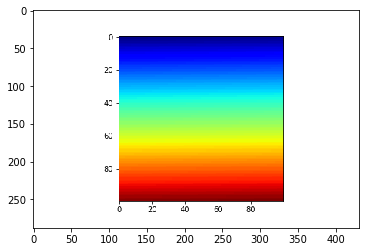

In [41]:
plt.imshow(img)

## 3.8 Exercise
1. Print the array of the image we've just imported. Use ```img.shape``` and explain the dimension of the array we observe.
2. What happens if we plot ```plt.imshow(img[:,:,0])``` or ```plt.imshow(img[:,:,1])```?

[[[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 ..., 
 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  ..., 
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]]
shape =(288, 432, 4)


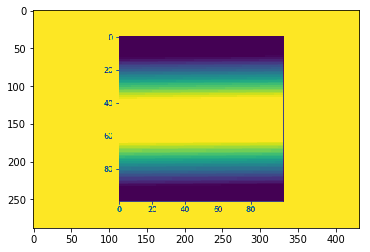

In [42]:
#answer**************************************************************
print(img)
print('shape ='+ str(img.shape)) # the k-dimension of the array will be 4 for RGBA color channels. 
plt.imshow(img[:,:,1]) # We can see the impact of just displaying one of the RGBA channels here. 
                       # Though A (alpha) channel doesn't seem to do anything.
#answer**************************************************************

## 3.9 Exercise

By now you must be thinking: *"Hmm i wonder if I can create a meme using Matplotlib"...*. Wonder no more, here's how to do it:
1. Download an image automatically by using ```urllib``` library.
    * import ```urllib.request```
    * use ```urllib.request.urlretrieve(your_url, your_file_name)``` 
    (NOTE: some websites don't allow automatic download of their images. Also keep ```your_file_name``` the same as the original name of the file you want to download)
    
2. Load the image and add your text.


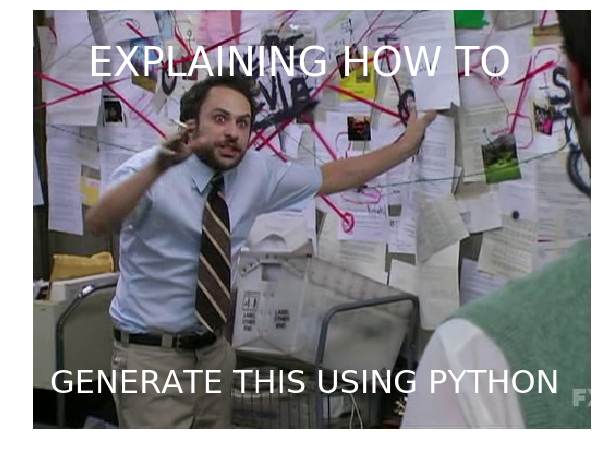

In [43]:
import urllib.request

# the image link
my_url = 'https://i.imgur.com/UaLpJOK.jpg';
# the file name must be the same
my_file_name = 'files/UaLpJOK.jpg';

# download the file into the current working folder
urllib.request.urlretrieve(my_url, my_file_name)

# load the file
charlie = mpimg.imread(my_file_name)

# plot, add text, and save the plot
plt.figure(figsize=(10,10))
plt.imshow(charlie)
plt.text(50,60,'EXPLAINING HOW TO',color='w', fontsize=40); # trial-and-error ro find the right x and y locations 
plt.text(15,350,'GENERATE THIS USING PYTHON',color='w', fontsize=32);
plt.axis('off'); 
plt.savefig('files/charlie_explaining_python.png', bbox_inches='tight', pad_inches=-0.33)

*"But I hate static images. They don't represent who I am. I want them to move around...."*.

Well... fret not, let's get a bit fancier....

In [44]:
# plot, add text, and save the plot
text = 'GENERATE THIS USING PYTHON'

from matplotlib import cm #import colormap
cmap = cm.get_cmap('prism')

for i in range(len(text)):
    # cmap will convert values 0 to 1 to RGBA value. 
    # we divide i by len(text) to scale value from 0 to 1.
    fancy_color = cmap(i/len(text)) 
                                    
    plt.figure(figsize=(10,10))
    plt.imshow(charlie)
    plt.text(50,60,'EXPLAINING HOW TO',color='w', fontsize=40); # This text is fixed
    # Keep adding a new letter everytime. Change the color using fancy_color define above
    plt.text(15,350,text[:i+1],color=fancy_color, fontsize=32); 
    plt.axis('off'); 
    plt.savefig('files/charlie_gif_'+str(i)+'.png', bbox_inches='tight', pad_inches=-0.33)
    plt.close() # supress the images from displaying here.

Check in your 'files' folder that you now have a series of images.

Then we convert them into a gif using Imageio library. 

In [45]:
import imageio

images = []
for i in range(len(text)):
    images.append(imageio.imread('files/charlie_gif_'+str(i)+'.png'))
imageio.mimsave('files/charlie.gif', images)

# delete the redundant images used to create the gif
import glob, os
for f in glob.glob("files/charlie_gif_*.png"):
    os.remove(f)

Check your folder - there should be a gif file.

By reverse-engineering the code above, now choose your own image and text.